<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%8B%A4%ED%95%AD%EB%B6%84%EB%A5%98(0920).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 다항분류
MNINST 레이블 사용

In [1]:
import tensorflow as tf

데이터를 불러온다

In [2]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


color picker

전처리를 해준다

In [3]:
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1
# 전처리 해서 밝기를 0 ~ 255에서 -1 에서 +1로 변환

In [5]:
x_train.max()

1.0

In [6]:
x_train.min()

-1.0

### 모형

모델을 정의를 해준다

In [7]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(),
    Dense(10, activation='softmax')
])

### 설정
- spars_categorical_crossentropy: 교차 엔트로피(범주가 여러 개일 때)

훈련 시키기 전에 설정을 해준다. 중요한건 loss

In [8]:
model.compile(
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])

validation : 중간 테스트를 얼마나 해볼꺼냐
모델의 초기세팅이 random이라 결과값이 약간 차이가 날 수 있다.

In [9]:
result = model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4552 - accuracy: 0.8640 - val_loss: 0.3038 - val_accuracy: 0.9087
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.9012 - val_loss: 0.2564 - val_accuracy: 0.9277
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3266 - accuracy: 0.9061 - val_loss: 0.2807 - val_accuracy: 0.9162
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3175 - accuracy: 0.9096 - val_loss: 0.2820 - val_accuracy: 0.9177
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3115 - accuracy: 0.9108 - val_loss: 0.2669 - val_accuracy: 0.9212
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.9126 - val_loss: 0.2687 - val_accuracy: 0.9215
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3031 - accuracy: 0.9144 - val_loss: 0.2572 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 917us/step - loss: 0.2927 - accuracy: 0.9172


[0.29274773597717285, 0.9172000288963318]

In [11]:
prob = model.predict(x_test) # x_test의 이미지로 확률 계산

313/313 [==============================] - 0s 800us/step


In [12]:
prob[0] # 0번 이미지의 확률

array([9.1244806e-07, 6.6260339e-12, 1.6221431e-05, 8.7977871e-03,
       1.8749439e-07, 4.0167804e-05, 2.6295096e-11, 9.9097568e-01,
       1.8382358e-05, 1.5065908e-04], dtype=float32)

In [13]:
y_test[0] #0번 이미지의 실제 레이블

7

In [15]:
y_pred = prob.argmax(axis=1) # 확률이 가장 높은 레이블 구하기

In [16]:
y_pred # 확률이 제일 높은 레이블들

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
y_test # 정답

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 직접 손글씨 입력해보기

In [29]:
# 이미지 불러오기
from PIL import Image
img = Image.open('5.png').convert('L')
img

In [30]:
# 이미지를 숫자로 바꾸기
import numpy as np
x = np.array(img)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  72, 191,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  96, 223, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 247,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  72, 232, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 223, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 151,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
x_train.shape # 그림의 장수, 가로 크기, 세로 크기

(60000, 28, 28)

In [31]:
x = np.expand_dims(x, 0) # x도 전처리를 해준다
x = x / 127.5 - 1

Q.127.5는 어디에서 왔어요?

In [23]:
255 / 2

127.5

In [24]:
0 / 127.5 - 1

-1.0

In [25]:
255 / 127.5 - 1

1.0

In [26]:
x.shape

(1, 1, 28, 28)

In [27]:
x.max()

1.0

In [32]:
prob = model.predict(x)

1/1 [==============================] - 0s 14ms/step


In [33]:
prob.argmax(axis=1)

array([3])

3이 아니구 5일세 이 친구야..ㅋㅋㅋ

# 이미지 파일로 모형 학습

### 데이터 다운로드

In [34]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2023-09-20 02:13:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 172.253.119.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   143MB/s    in 0.5s    

2023-09-20 02:13:12 (143 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/do

In [35]:
data_dir = 'cats_and_dogs_filtered'
BATCH_SIZE = 32
IMG_SIZE = (224,224)

In [36]:
# 훈련 데이터 로딩
train_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/train',
        shuffle=True,  # 골고루 섞어서 불러와라
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [37]:
# 검증 데이터 로딩
validation_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/validation',
        shuffle=False,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


전처리 하기

In [38]:
model = tf.keras.Sequential([
    Rescaling(scale=1/127.5, offset=-1), # 전처리 scale만큼 곱해주고, offset 더해줌
    Flatten(),
    Dense(1, activation="sigmoid"),  # 이항분류
])

In [39]:
model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"])
model.fit(train_dataset, validation_data=validation_dataset)

63/63 [==============================] - 4s 50ms/step - loss: 7.3567 - accuracy: 0.5350 - val_loss: 11.7937 - val_accuracy: 0.4980


In [40]:
# 0 ~ 255 숫자가 너무 크고 모두 양수
# -1 ~ +1 숫자도 작고, +,-가 다 있음
255 / 127.5 - 1 # 원래 최댓값이 255 -> +1
0 / 127.5 - 1  # 원래 최솟값이 0 -> -1

-1.0

Q. 보통 어디에서 새로운 코딩이나 머신러닝 모델 관련 싸이트를 찾으세요? Tech 매거진?

A. 일단 심심할 때마다 검색
tensorflow alternatives
같은 키워드들을 몇번 보게되면 검색 해본다

블로그, 트위터

기술분야 전문 블로그, 트위터, 유튜브, 메일링 리스트, 페이스북 구독
추천시스템 -> 다 구독하면 알아서 새로운 소식이 뜸

가끔 심심할 때마다 적어둔 키워드를 본다
내가 가만히 있어도 자꾸 키워드가 쌓이게

제일 좋은 공부방법: 남한테 가르쳐 줌(스터디그룹)
백날 설명 들어도 소용 X. 내가 설명 해줘야 머리에 남음ㅋㅋㅋ

### 모델 불러오기

In [44]:
from tensorflow.keras.models import load_model
tm = load_model('keras_model.h5')

model = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(scale=1/127.5, offset=-1),
    tm
])

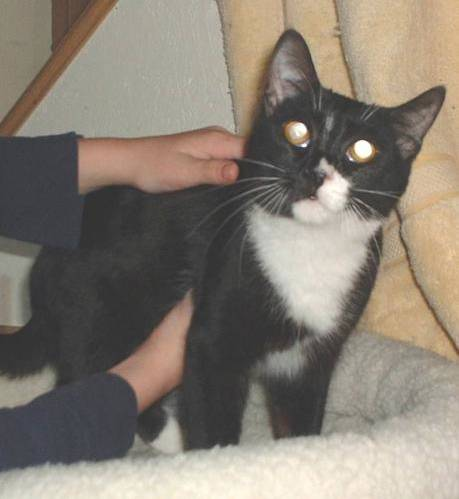

In [45]:
img = Image.open(
    'cats_and_dogs_filtered/validation/cats/cat.2000.jpg')
img

In [46]:
a = np.asarray(img, dtype='float32')  # 실수로 변환
a.shape # 가로, 세로, 3색(RGB)

(499, 459, 3)

In [47]:
data = np.expand_dims(a, 0)
data.shape  # 그림 장수(1장), 가로, 세로, 3색(RGB)

(1, 499, 459, 3)

In [48]:
# 사진 한 장을 넣었을 때
model.predict(data)  # cats, dogs 순서대로 확률이 나옴

1/1 [==============================] - 1s 1s/step


array([[0.9826193 , 0.01738074]], dtype=float32)

In [49]:
# 1000개의 validation 이미지로 테스트 했을 때
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.evaluate(validation_dataset) # 왼쪽은 loss, 오른쪽은 정확도(accuracy)

32/32 [==============================] - 10s 263ms/step - loss: 0.1157 - accuracy: 0.9530


[0.11570513993501663, 0.953000009059906]

model.fit -> 학습 시키는것

model.evaluate -> 평가 & 테스트

----------
Q. 장수를 많이하면 당연히 정확도가 올라가겠죠..? 여기서도 너무 많이 넣으면 정확도가 안올라갈 수 있나요

A. 데이터는 무조건 많은게 좋다(다다익선) 근데 데이터는 적은데 epoch가 너무 많으면 선이 안 그어짐...그러면 모델이 엉망이 되고 오히려 성능이 떨어짐. 데이터는 적당히~

Q. 적당히의 기준은요?

A. 성능을 기준으로 판단. 새로운 데이터를 줬을때

-> 예측을 잘 한다면(적당함)

-> 예측 못함(epoch 너무 적거나 많음)

보통 해결책: epoch마다 저장을 해놨다가 가장 성능 좋은 epoch를 불러오면됨

_데이터는 적은데, 논리를 너무 복잡하게 가져가면 예측력 떨어짐._ 정치나 경제 관련 해설하는 분들 지나간 일은 기가막히게 설명을 잘함 앞으로 일어날 일은 예측을 못함

---------------
Teachable Machine - 굉장히 복잡한 구조의 모델 사용(Mobile Machine)

# 전이 학습
기존의 머신러닝에서 문제점을 해결해줌

- 근원 문제 source에 학습시킨 모형을 새로운 대상 문제 target에 적용하는 것
- 사전 학습 pretraining : 근원 문제에 학습 시키는 것 많은 데이터를 사용
- 미세 조정 fine tuning 대상 문제에 학습 시키는 것 적은 데이터를 사용
ex) 사람이 피아노를 배워놓으면 아코디언이나 오르간을 잘 칠 수 있듯이

아..그러면 만능모델을 하나 만들어서 다 때려넣자!!

- 기초 모델foundation model : 컴퓨터 비전이나 자연어 처리처럼 넓은 종류의 분야에 대해 적용할 수 있는 하나의 모델(현재의 트랜드)

## 전이 학습의 방식
- 사전학습된 모형을 추가 학습 없이 그대로 사용
ex) ChatGPT
- 사전학습된 모형의 전반부를 특징 추출기로 사용 후반부에 분류기만 추가하고 추가된 부분만 학습(빨리 끝남) ex) Teachable Machine
- 사전 학습된 부분을 포함해서 전체적으로 미세 조정(거의 없다)
